# Load datasets

In [1]:
!pip install requests
import requests

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. HearthstoneJSON

In [3]:
response = requests.get("https://api.hearthstonejson.com/v1/36393/enUS/cards.json")
response.status_code

200

In [ ]:
cards_df = pd.DataFrame.from_records(response.json())

In [5]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 34 columns):
attack                2797 non-null float64
cardClass             7986 non-null object
cost                  5876 non-null float64
dbfId                 8001 non-null float64
faction               93 non-null object
health                3331 non-null float64
id                    8002 non-null object
name                  8001 non-null object
rarity                2766 non-null object
set                   8001 non-null object
type                  8001 non-null object
artist                3245 non-null object
collectible           2210 non-null object
flavor                2206 non-null object
playRequirements      1092 non-null object
text                  6606 non-null object
mechanics             3129 non-null object
referencedTags        640 non-null object
race                  941 non-null object
elite                 677 non-null object
targetingArrowText    156 non-null

Notar que esto incluye **todas** las cartas del juego. De acuerdo con la documentación, todo en el juego es una carta, incluso hérores, poderes de hérores y hechizos.

## 2. History of Hearthstone - Kaggle

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


De acuerdo con kaggle, refs.json fue extraído de la API de hearthstone. Verificaremos que estas bases de datos coincidan en el análisis exploratorio de las bases de datos.

In [ ]:
deck_df = pd.read_csv('/content/drive/My Drive/Proy_recsys/Datasets/data.csv')
cards_kaggle = pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/refs.json')

In [8]:
deck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346232 entries, 0 to 346231
Data columns (total 41 columns):
craft_cost        346232 non-null int64
date              346232 non-null object
deck_archetype    346232 non-null object
deck_class        346232 non-null object
deck_format       346232 non-null object
deck_id           346232 non-null int64
deck_set          346232 non-null object
deck_type         346232 non-null object
rating            346232 non-null int64
title             346224 non-null object
user              346232 non-null object
card_0            346232 non-null int64
card_1            346232 non-null int64
card_2            346232 non-null int64
card_3            346232 non-null int64
card_4            346232 non-null int64
card_5            346232 non-null int64
card_6            346232 non-null int64
card_7            346232 non-null int64
card_8            346232 non-null int64
card_9            346232 non-null int64
card_10           346232 non-null int64
c

In [9]:
cards_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 32 columns):
artist                1527 non-null object
attack                1431 non-null float64
cardClass             3114 non-null object
collectible           1206 non-null float64
cost                  2420 non-null float64
dbfId                 3116 non-null float64
flavor                1193 non-null object
health                1539 non-null float64
id                    3117 non-null object
name                  3116 non-null object
playerClass           3114 non-null object
rarity                1598 non-null object
referencedTags        263 non-null object
set                   3116 non-null object
text                  2665 non-null object
type                  3116 non-null object
elite                 353 non-null float64
mechanics             1061 non-null object
howToEarnGolden       290 non-null object
race                  435 non-null object
playRequirements      476 non-n

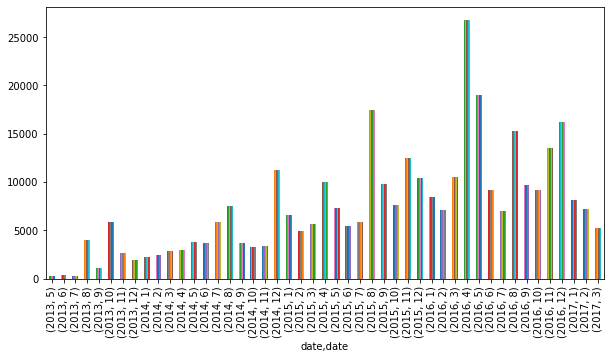

In [10]:
deck_df["date"] = deck_df["date"].astype("datetime64")
deck_df.groupby([deck_df["date"].dt.year, deck_df["date"].dt.month]).count().plot(kind="bar", legend=False, figsize=(10,5))

## 3. Collect-O-Bot



Dados los años anteriores, utilizaremos sets de juegos correspondientes a partidas entre Junio de 2016 y Abril del 2017. En Collect-O-Bot no hay datos anteriores.

In [11]:
games_history = pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2016-06.json')
games_history.append(pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2016-07.json'))
games_history.append(pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2016-08.json'))
games_history.append(pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2016-09.json'))
games_history.append(pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2016-10.json'))
games_history.append(pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2016-11.json'))
games_history.append(pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2016-12.json'))
games_history.append(pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2017-01.json'))
games_history.append(pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2017-02.json'))
games_history.append(pd.read_json('/content/drive/My Drive/Proy_recsys/Datasets/2017-03.json'))

,range_start,range_end,unique_users,total_games,games
0,2016-06-01T00:00:00Z,2016-07-01T00:00:00Z,38,7950,{'user_hash': '853B97737D848AE2F22D60931C888CB...
1,2016-06-01T00:00:00Z,2016-07-01T00:00:00Z,38,7950,{'user_hash': '853B97737D848AE2F22D60931C888CB...
2,2016-06-01T00:00:00Z,2016-07-01T00:00:00Z,38,7950,{'user_hash': '853B97737D848AE2F22D60931C888CB...
3,2016-06-01T00:00:00Z,2016-07-01T00:00:00Z,38,7950,{'user_hash': '853B97737D848AE2F22D60931C888CB...
4,2016-06-01T00:00:00Z,2016-07-01T00:00:00Z,38,7950,{'user_hash': '853B97737D848AE2F22D60931C888CB...
...,...,...,...,...,...
16268,2017-03-01T00:00:00Z,2017-04-01T00:00:00Z,69,16273,{'user_hash': '70A90F443D0F54B4B1601CDA738EEA6...
16269,2017-03-01T00:00:00Z,2017-04-01T00:00:00Z,69,16273,{'user_hash': '03019D3B5094E121EBCEEB6F21F0FBE...
16270,2017-03-01T00:00:00Z,2017-04-01T00:00:00Z,69,16273,{'user_hash': '03019D3B5094E121EBCEEB6F21F0FBE...
16271,2017-03-01T00:00:00Z,2017-04-01T00:00:00Z,69,16273,{'user_hash': '03019D3B5094E121EBCEEB6F21F0FBE...


# Análisis Exploratorio de Datos

Primero analizaremos cada base de datos por separado para posteriormente enlazarlas.

## 1. HearthstoneJSON

In [12]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 34 columns):
attack                2797 non-null float64
cardClass             7986 non-null object
cost                  5876 non-null float64
dbfId                 8001 non-null float64
faction               93 non-null object
health                3331 non-null float64
id                    8002 non-null object
name                  8001 non-null object
rarity                2766 non-null object
set                   8001 non-null object
type                  8001 non-null object
artist                3245 non-null object
collectible           2210 non-null object
flavor                2206 non-null object
playRequirements      1092 non-null object
text                  6606 non-null object
mechanics             3129 non-null object
referencedTags        640 non-null object
race                  941 non-null object
elite                 677 non-null object
targetingArrowText    156 non-null

En primer lugar, analizaremos la capacidad de ataque de las cartas. Notemos que no todas las cartas tienen capacidad de ataque, sino que solo aquellas destinadas a intentar derrotar al oponente.

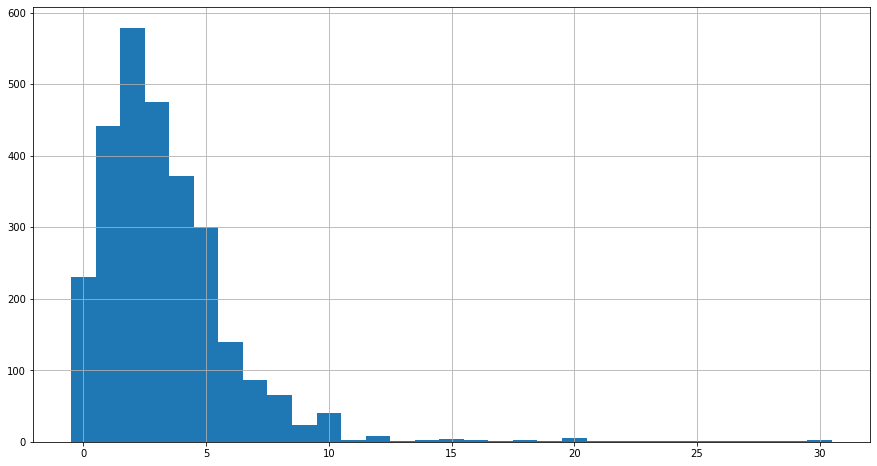

In [13]:
cards_df['attack'].hist(bins=np.arange(0,32,1)-0.5, figsize=(15,8))

Notamos que la mayoría de las cartas tienen una capacidad de ataque de dos puntos, mientras que una muy baja cantidad presenta capacidad de ataque mayor a 10 puntos. Estos datos con baja frecuencia no pueden ser considerados como outliers, dado que si alguien posee en su mano una carta con 30 puntos de ataque, el sistema debe recomendarla con alta seguridad.

A continuación analizaremos los puntos de ataque por clase de cartas.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


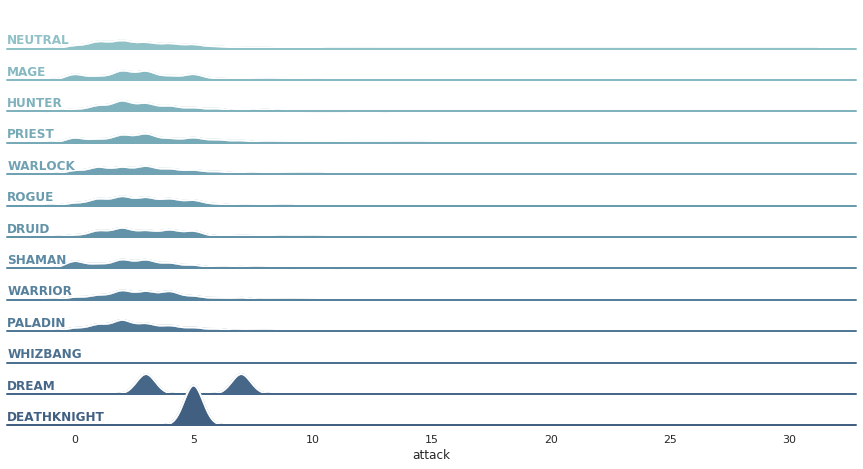

In [14]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(20, rot=-.25, light=.7)
g = sns.FacetGrid(cards_df, row="cardClass", hue="cardClass", aspect=25, height=.5, palette=pal)

g.map(sns.kdeplot, "attack", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.4)
g.map(sns.kdeplot, "attack", clip_on=False, color="w", lw=2, bw=.4)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "attack")
g.fig.subplots_adjust(hspace=-.25)

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)



In [ ]:
import io
import ast
import math
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

TEST_1 = 3
TEST_2 = 6
K_GLOBAL = 10

In [16]:
aux_dataframe = cards_df[['name', 'id', 'cardClass', 'attack', 'cost', 'health', 'rarity', 'mechanics']].copy() # seleccionar los atributos que nos interesan
aux_dataframe.dropna(inplace=True)
aux_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 3 to 8001
Data columns (total 8 columns):
name         1587 non-null object
id           1587 non-null object
cardClass    1587 non-null object
attack       1587 non-null float64
cost         1587 non-null float64
health       1587 non-null float64
rarity       1587 non-null object
mechanics    1587 non-null object
dtypes: float64(3), object(5)
memory usage: 111.6+ KB


In [ ]:
def get_first_mechanic(row):
  return row['mechanics'][0]

aux_dataframe['mechanics_upacked'] = aux_dataframe.apply(lambda row: get_first_mechanic(row), axis=1)
aux_dataframe.drop(['mechanics'], axis=1, inplace=True)

In [18]:
aux_dataframe

,name,id,cardClass,attack,cost,health,rarity,mechanics_upacked
3,Fallen Hero,AT_003,MAGE,3.0,2.0,2.0,RARE,HEROPOWER_DAMAGE
7,Dalaran Aspirant,AT_006,MAGE,3.0,4.0,5.0,COMMON,INSPIRE
9,Spellslinger,AT_007,MAGE,3.0,3.0,4.0,COMMON,BATTLECRY
11,Rhonin,AT_009,MAGE,7.0,8.0,7.0,LEGENDARY,DEATHRATTLE
12,Ram Wrangler,AT_010,HUNTER,3.0,5.0,3.0,RARE,BATTLECRY
...,...,...,...,...,...,...,...,...
7997,"N'Zoth, the Corruptor",WE1_035,NEUTRAL,5.0,10.0,7.0,LEGENDARY,BATTLECRY
7998,Sylvanas Windrunner,WE1_036,NEUTRAL,5.0,6.0,5.0,LEGENDARY,DEATHRATTLE
7999,Ragnaros the Firelord,WE1_037,NEUTRAL,8.0,8.0,8.0,LEGENDARY,CANT_ATTACK
8000,The Curator,WE1_038,NEUTRAL,4.0,7.0,6.0,LEGENDARY,BATTLECRY


In [ ]:
# Seleccionar los atribudts de las cartas que irán a embeddings


ataques = pd.unique(aux_dataframe['attack'])
costos = pd.unique(aux_dataframe['cost'])
salud = pd.unique(aux_dataframe['health']).astype(int)
rareza = pd.unique(aux_dataframe['rarity'])
mecanicas = pd.unique(aux_dataframe['mechanics_upacked'])


Hay que formatear los valores únicos de las características de las cartas para que sean legibles en el futuro. Se les agregan sus respectivos índices para armar embeddings con ellos.

In [ ]:
# crear un dataframepara cada campo de características relevantes de una carta
ataques = pd.DataFrame(data= ataques, index=range(0, len(ataques)))
costos = pd.DataFrame(data= costos, index=range(0, len(costos)))
salud = pd.DataFrame(data= salud, index=range(0, len(salud)))
rareza = pd.DataFrame(data= rareza, index=range(0, len(rareza)))
mecanicas = pd.DataFrame(data= mecanicas, index=range(0, len(mecanicas)))


# Generar una nueva columna con nuevos índices que representan a cada valor de cada campo 
ataques['value'] = ataques.index + 1
costos['value'] = costos.index + 1
salud['value'] = salud.index + 1
rareza['value'] = rareza.index + 1
mecanicas['value'] = mecanicas.index + 1

In [ ]:
embeddings_cartas = []
nombres_cartas = []
ll = []
idd = []

for carta in aux_dataframe.index: # para cada carta de hearthstone json
  try:
    row = aux_dataframe.iloc[carta,:]
    ataque_carta = row['attack']
    costo_carta = row['cost']
    salud_carta = row['health']
    rareza_carta = row['rarity']
    mecanica_carta = row['mechanics_upacked']
    # por cada carta se recodifica el valor de cada uno de sus campos a ints
    # los ints se sacan de los dataframes anteriores donde agregamos la columna 'value' que los contiene
    fuera= 0

    ind1 = ataques.iloc[:,0].isin([ataque_carta])
    ind1 = ind1[ind1 == True].index[0]
    ataque_carta = ataques['value'][ind1]

    ind2 = costos.iloc[:,0].isin([costo_carta])
    ind2 = ind2[ind2 == True].index[0]
    costo_carta = costos['value'][ind2]

    ind3 = salud.iloc[:,0].isin([salud_carta])
    try:
      ind3 = ind3[ind3 == True].index[0]
      salud_carta = salud['value'][ind3]
    except: 
      fuera = 1

    ind4 = rareza.iloc[:,0].isin([rareza_carta])
    try:
      ind4 = ind4[ind4 == True].index[0]
      rareza_carta = rareza['value'][ind4]
    except:
      fuera = 1

    ind5 = mecanicas.iloc[:,0].isin([mecanica_carta])
    try:
      ind5 = ind5[ind5 == True].index[0]
      mecanica_carta = mecanicas['value'][ind5]
    except:
      fuera = 1

    if (fuera == 0): # se crea un dataframe final en los que cada carta tiene un embedding que es numpy array de los campos recién codificados
      embedding = [ataque_carta, costo_carta, salud_carta, rareza_carta, mecanica_carta]
      # Converting integer list to string list 
      # embedding = np.array(embedding)
      nombres_cartas.append(aux_dataframe['name'][carta])
      embeddings_cartas.append(embedding)
      ll.append(aux_dataframe['cardClass'][carta].upper())
      idd.append(aux_dataframe['id'][carta])
  except:
    continue



In [22]:

df = pd.DataFrame({'Names': nombres_cartas, 'Embeddings': embeddings_cartas, 'Class': ll, 'ID': idd}) # el dataframe de resumen, sus embeddings aún no informan si cada carta petenece a un mazo profesional
print(df)


                    Names        Embeddings    Class       ID
0             Fallen Hero   [2, 4, 4, 3, 4]     MAGE   AT_003
1        Dalaran Aspirant   [1, 3, 5, 4, 5]     MAGE   AT_006
2            Spellslinger   [3, 6, 3, 3, 2]     MAGE   AT_007
3                  Rhonin   [1, 1, 1, 1, 5]     MAGE   AT_009
4            Ram Wrangler   [3, 7, 3, 1, 2]   HUNTER   AT_010
..                    ...               ...      ...      ...
395      EVIL Conscripter  [3, 10, 4, 3, 3]   PRIEST  DAL_413
396        EVIL Miscreant   [3, 7, 2, 3, 4]    ROGUE  DAL_415
397    Hench-Clan Burglar  [7, 4, 8, 3, 16]    ROGUE  DAL_416
398  Heistbaron Togwaggle   [6, 6, 6, 3, 3]    ROGUE  DAL_417
399   Arch-Villain Rafaam   [3, 7, 2, 3, 5]  WARLOCK  DAL_422

[400 rows x 4 columns]


**Procesar History of Hearthstone**

In [23]:
# Select deck_df attributes to use as reference
available_cards = deck_df[['deck_id', 'deck_class', 'card_0', 'card_1', 'card_2', 'card_3', 'card_4', 'card_5', 'card_6', 'card_7', 'card_8', 'card_9', 'card_10', 'card_11', 'card_12', 'card_13', 'card_14', 'card_15', 'card_16', 'card_17', 'card_18', 'card_19', 'card_20', 'card_21', 'card_22', 'card_23', 'card_24', 'card_25', 'card_26', 'card_27', 'card_28', 'card_29']]
#kaggle_json = cards_kaggle[pd.notnull(cards_kaggle['attack'])]
#kaggle_json = kaggle_json[pd.notnull(kaggle_json['id'])]
kaggle_json = cards_kaggle[pd.notnull(cards_kaggle['name'])] # solo importa que las cartas referenciadas tengan su nombre para buscarlas en hearthstone json
#kaggle_json = kaggle_json[pd.notnull(kaggle_json['cost'])]
#kaggle_json = kaggle_json[pd.notnull(kaggle_json['health'])]
#kaggle_json = kaggle_json[pd.notnull(kaggle_json['mechanics'])]
#kaggle_json = kaggle_json[pd.notnull(kaggle_json['rarity'])]
# kaggle_json = kaggle_json.reset_index(drop=True)
print(available_cards)
print(kaggle_json)

#kaggle_json['value'] = kaggle_json.index
#coded_cards = []

#for item in range(0, len(kaggle_json['value'])):
#    value = kaggle_json.iat[item, kaggle_json.columns.get_loc('value')]
#    if value not in coded_cards:
#      coded_cards.append(value)

#print(coded_cards)

#for i in range(2, 32): # solo las columnas de cartas
#  columna = available_cards.iloc[:,i]
#  for b in range(0, len(columna)):
#    valor = columna.iloc[b]
#    if valor not in coded_cards:
#        available_cards.iat[b, i] = -1

        deck_id deck_class  card_0  card_1  ...  card_26  card_27  card_28  card_29
0        433004     Priest       9     237  ...     2683     2736     2568     2883
1        433003    Warrior      75      75  ...     2078     2510     2729     2736
2        433002       Mage     195     195  ...     2064     2078    38710    38710
3        433001    Warrior      75     290  ...     2729     2729     2736     2760
4        432997    Paladin     476     476  ...     2717     2717     2889     2889
...         ...        ...     ...     ...  ...      ...      ...      ...      ...
346227   495042    Paladin     251     251  ...    38781    38781    38911    38911
346228   427586      Rogue     180     180  ...     1372     1651     2884     2884
346229   427574    Paladin     250     290  ...     2889     2901     2949     2951
346230   427571      Druid      64      64  ...     2782     2948    38319    38319
346231   427572    Warlock      48      48  ...     2288     2288     2895  

In [24]:
print(available_cards.shape)
#print(available_cards.iloc[162054, :])
print(available_cards)
#final_cards = available_cards

#for num in range(0,29):
#  final_cards = final_cards.drop(final_cards[final_cards['card_'+str(num)] == -1].index) 

#for u in range(0, len(final_cards_1['deck_id'])):
#  roww = final_cards_1.iloc[u,2:32]
#  ok = 0
#  for y in range(0, len(roww)):
#    if roww.iloc[y] != -1:
#      ok = 1
#  if ok == 0:
#    final_cards = final_cards.drop(final_cards.index[u])

#print(final_cards.shape)
#print(final_cards)

# final cards no da información relevante así que por ahora no trabajaremoscon cartas como miembros de un mazo en particular, solo importa que las cartas estén en los mazos profesionales

(346232, 32)
        deck_id deck_class  card_0  card_1  ...  card_26  card_27  card_28  card_29
0        433004     Priest       9     237  ...     2683     2736     2568     2883
1        433003    Warrior      75      75  ...     2078     2510     2729     2736
2        433002       Mage     195     195  ...     2064     2078    38710    38710
3        433001    Warrior      75     290  ...     2729     2729     2736     2760
4        432997    Paladin     476     476  ...     2717     2717     2889     2889
...         ...        ...     ...     ...  ...      ...      ...      ...      ...
346227   495042    Paladin     251     251  ...    38781    38781    38911    38911
346228   427586      Rogue     180     180  ...     1372     1651     2884     2884
346229   427574    Paladin     250     290  ...     2889     2901     2949     2951
346230   427571      Druid      64      64  ...     2782     2948    38319    38319
346231   427572    Warlock      48      48  ...     2288     22

In [ ]:
# Basándose en los contenidos de refs.json sepuede saber instantáneamente cuáles cartas son profesionales, si no lo fueran no estarían presentes
# Por eso solo se usan sus nombres para buscar las cartas en el dataframe anterior
nombres_kaggle = kaggle_json['name']
hearthstone_cards = df['Names']
dff = df # Se copia por si se mete la pata para no tener que ejecutar la otras celdas de nuevo

for cartas in range(0, len(hearthstone_cards)):
  nombre = hearthstone_cards.iloc[cartas]
  indice = dff.index[dff['Names'] == nombre]
  if len(dff.iat[indice[0], 1]) < 6:
    if nombre in nombres_kaggle.unique():
      dff.iat[indice[0], 1] = np.append(dff.iat[indice[0], 1], 1) # Si la carta se encontró en el dataframe se agrega un 1 final a su embedding
    else:
      dff.iat[indice[0], 1] = np.append(dff.iat[indice[0], 1], 0) # En caso contrario se agrega un 0

In [26]:
print(dff)

                    Names           Embeddings    Class       ID
0             Fallen Hero   [2, 4, 4, 3, 4, 1]     MAGE   AT_003
1        Dalaran Aspirant   [1, 3, 5, 4, 5, 1]     MAGE   AT_006
2            Spellslinger   [3, 6, 3, 3, 2, 1]     MAGE   AT_007
3                  Rhonin   [1, 1, 1, 1, 5, 1]     MAGE   AT_009
4            Ram Wrangler   [3, 7, 3, 1, 2, 1]   HUNTER   AT_010
..                    ...                  ...      ...      ...
395      EVIL Conscripter  [3, 10, 4, 3, 3, 0]   PRIEST  DAL_413
396        EVIL Miscreant   [3, 7, 2, 3, 4, 0]    ROGUE  DAL_415
397    Hench-Clan Burglar  [7, 4, 8, 3, 16, 0]    ROGUE  DAL_416
398  Heistbaron Togwaggle   [6, 6, 6, 3, 3, 0]    ROGUE  DAL_417
399   Arch-Villain Rafaam   [3, 7, 2, 3, 5, 0]  WARLOCK  DAL_422

[400 rows x 4 columns]


**Procesar Collect-O-Bot**

In [27]:
user_history = games_history['games'] # solo importan los contenidos de los juegos en los que cada usaurio demostro su mazo propio

users = []
heroes = []
games_played = []
cards_played = []
available_cards = dff['Names'].unique()

i = 0 # se agrega un identificador no personalizado para cada mazo, no importa que un mismo usuario tenga varios mazos porque 
# cuando uno construye un mazo en la práctica juega como distintos héroes, o 'usuarios'. Incluso se pueden crear varios mazos para un solo héroe, solo importan sus composiciones y el héroe.
for num in range(0, len(user_history)):
  history = user_history[num]
  plays = history['card_history']
  if len(plays) >0: # si en el juego se jugaron cartas entonces se incluye al usuario
    users.append(str(i))
    heroes.append(history['hero'].upper())
    games_played.append(plays)
    i += 1

for game in games_played: # procesar cada juego para hallar las cartas
  temp_cards = []
  for turn in game: # son diccionarios que describen quien jugo en que turno y cual carta uso
    if turn['player'] == 'me': # esto indica que jugo el usuario y no su oponente
      card = turn['card']['name']
      if card in available_cards: # solo se agregan las cartas que tienen embeddings OPCIONAL: y que sean unicas
        temp_cards.append(card)
  cards_played.append(temp_cards)
user_data = pd.DataFrame({'User': users, 'Hero': heroes, 'Cards': cards_played})
print(user_data) # esta bien que se repitan los usuarios porque en cada juego usa un mazo distinto

      User     Hero                                              Cards
0        0  WARRIOR  [Blackwing Corruptor, Blackwing Corruptor, Twi...
1        1  WARRIOR  [Alexstrasza's Champion, Blackwing Corruptor, ...
2        2  WARRIOR             [Twilight Guardian, Twilight Guardian]
3        3  WARRIOR                                 [Drakonid Crusher]
4        4  WARRIOR        [Alexstrasza's Champion, Twilight Guardian]
...    ...      ...                                                ...
7864  7864   SHAMAN      [Totem Golem, Flame Juggler, Tuskarr Totemic]
7865  7865   SHAMAN  [Flame Juggler, Totem Golem, Tuskarr Totemic, ...
7866  7866   SHAMAN    [Flame Juggler, Flame Juggler, Tuskarr Totemic]
7867  7867  WARLOCK  [Voidwalker, Imp Gang Boss, Blood Imp, Abusive...
7868  7868   HUNTER                                     [King's Elekk]

[7869 rows x 3 columns]


**Uso de Embeddings con Datos de Usuarios**

Normalización de datos y reducción de dimensionalidad

In [ ]:
indices_a_carta = {}
carta_a_indice = {}


rows = dff.shape[0]
columns = dff['Embeddings'][0].shape[0]


embeddings_matrix = np.empty(shape=(rows, columns))
serie_name = dff['Names']

for k, cardd in enumerate(serie_name): # se crea matriz de embeddings
  indices_a_carta[k] = cardd
  indice_carta = serie_name[serie_name == cardd].index[0]
  carta_a_indice[cardd] = k
  embeddings_matrix[k] = dff['Embeddings'][indice_carta]


  # FUNCIONES PARA LA SANIDAD MENTAL

def embedding_x_indice(indice): # funcion para no estribir un rosario cada vez que se quiera sacar un simple embedding
  return dff['Embeddings'][serie_name[serie_name == indices_a_carta[indice]].index[0]]

def nombre_x_indice(indice): # lo mismo pero para nombres de cartas
  return dff['Names'][serie_name[serie_name == indices_a_carta[indice]].index[0]]

In [29]:
list(embeddings_matrix[0])[0:20], embedding_x_indice(0) # revisar si la matriz quedó bien construída

([2.0, 4.0, 4.0, 3.0, 4.0, 1.0], array([2, 4, 4, 3, 4, 1]))

### Ahora usar Scaler:

In [ ]:
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(embeddings_matrix)

In [ ]:
# definimos funcion para aplicar pca
def pca_it(n_components, matrix):
  pca = PCA(n_components=n_components)
  return pca.fit_transform(matrix)

In [ ]:
pca3 = pca_it(TEST_1, scaled_embeddings)
pca6 = pca_it(TEST_2, scaled_embeddings)

**Definición de scores**

*Train-test split*

In [ ]:
SPLIT = 0.7 # porcentaje de mazos en training

rows_data = user_data.shape[0]
columns_data = user_data.shape[1]

userss = []
heros = []
cards_train = []
cards_test = []



for a in range(0, len(user_data)): # el split se hace en las cartas de cada mazo que el usuario posee, ya que no hay repetición de mazos
  if len(user_data['Cards'][a]) > 10: # para que el split funcione se usan mazos con más de 10 cartas
    #print(len(user_data['Cards'][a]))
    #print(int(SPLIT*len(user_data['Cards'][a])))
    userss.append(user_data['User'][a])
    heros.append(user_data['Hero'][a])
    splitind = int(SPLIT*len(user_data['Cards'][a]))

    cards_train.append(user_data['Cards'][a][0:splitind])
    cards_test.append(user_data['Cards'][a][splitind+1:len(user_data['Cards'][a])])

TRAIN_SET = pd.DataFrame({'User': userss, 'Hero': heros, 'Cards': cards_train})
TEST_SET = pd.DataFrame({'User': userss, 'Hero': heros, 'Cards': cards_test})

In [34]:
print(TRAIN_SET)
print(TEST_SET)

    User     Hero                                              Cards
0    559  WARLOCK  [Imp Gang Boss, Voidwalker, Imp Gang Boss, Abu...
1    733    ROGUE  [Imp Gang Boss, Dragon Egg, Undercity Valiant,...
2   2020  WARLOCK  [Imp Gang Boss, Flame Juggler, Imp Gang Boss, ...
3   2028   SHAMAN  [Totem Golem, Totem Golem, Tuskarr Totemic, Fi...
4   3015  WARLOCK  [Imp Gang Boss, Blackwing Technician, Twilight...
5   3293   PRIEST  [Wyrmrest Agent, Northshire Cleric, Blackwing ...
6   3404     MAGE  [Flamewaker, Flamewaker, Mirror Image, Mirror ...
7   3908   PRIEST  [Injured Blademaster, Northshire Cleric, Justi...
8   4055  WARLOCK  [Voidwalker, Imp Gang Boss, Abusive Sergeant, ...
9   4081   SHAMAN  [Tuskarr Totemic, Totem Golem, Flame Juggler, ...
10  6164  WARLOCK  [Abusive Sergeant, Abusive Sergeant, Abusive S...
11  6710   SHAMAN  [Flame Juggler, Abusive Sergeant, Argent Horse...
12  6810   SHAMAN  [Tuskarr Totemic, Flame Juggler, Abusive Serge...
13  7578  WARLOCK  [Voidwalker, Bl

In [35]:
sim_matrix3 = np.empty(shape=(rows,rows))
#print(sim_matrix)
for k in range(rows):
  for j in range(k,rows):
    if j==k:
      sim_matrix3[k,j] = 1
    else:
      result = np.dot(pca3[k],pca3[j])/(np.linalg.norm(pca3[k],2)*np.linalg.norm(pca3[j],2))
      sim_matrix3[k,j] = result
      sim_matrix3[j,k] = result
print(sim_matrix3)

[[ 1.          0.87649897  0.83233384 ... -0.95847476 -0.48000752
   0.01543798]
 [ 0.87649897  1.          0.7774217  ... -0.70902726 -0.08269984
   0.49485551]
 [ 0.83233384  0.7774217   1.         ... -0.72444786 -0.04293448
   0.11753604]
 ...
 [-0.95847476 -0.70902726 -0.72444786 ...  1.          0.69585577
   0.25824938]
 [-0.48000752 -0.08269984 -0.04293448 ...  0.69585577  1.
   0.69969484]
 [ 0.01543798  0.49485551  0.11753604 ...  0.25824938  0.69969484
   1.        ]]


In [36]:
sim_matrix6 = np.empty(shape=(rows,rows))
#print(sim_matrix)
for k in range(rows):
  for j in range(k,rows):
    if j==k:
      sim_matrix6[k,j] = 1
    else:
      result = np.dot(pca6[k],pca6[j])/(np.linalg.norm(pca6[k],2)*np.linalg.norm(pca6[j],2))
      sim_matrix6[k,j] = result
      sim_matrix6[j,k] = result
print(sim_matrix6)

[[ 1.          0.89173912  0.75019418 ... -0.63809176 -0.4827033
  -0.07040302]
 [ 0.89173912  1.          0.50003262 ... -0.23970419 -0.26242206
  -0.06413713]
 [ 0.75019418  0.50003262  1.         ... -0.73559523 -0.18914865
   0.27042634]
 ...
 [-0.63809176 -0.23970419 -0.73559523 ...  1.          0.55115409
  -0.02132221]
 [-0.4827033  -0.26242206 -0.18914865 ...  0.55115409  1.
   0.48984741]
 [-0.07040302 -0.06413713  0.27042634 ... -0.02132221  0.48984741
   1.        ]]


*Métricas*

In [ ]:
def consumed(user):
  raise 'ValueError'

def consumido(user): # va a buscar las cartas de mazo de un usuario de training set
  ref = TRAIN_SET['User']
  return TRAIN_SET['Cards'][ref[ref == user].index[0]]

consumidos = {}
for user in TRAIN_SET['User'].unique():
  consumed = consumido(user)
  consumidos[user] = [carta_a_indice[str(cart)] for cart in consumed]

def consumido_t(user): # va a buscar las cartas de mazo de un usuario de testing set
  ref = TEST_SET['User']
  return TEST_SET['Cards'][ref[ref == user].index[0]]

consumidos_ocultos = {}
for user in TEST_SET['User'].unique():
  consumed = consumido_t(user)
  consumidos_ocultos[user] = [carta_a_indice[str(cart)] for cart in consumed]

def maximum(user,i, embeddings):
  if embeddings.shape[1]==TEST_1:
    scores = [sim_matrix3[j,i] for j in consumidos[user]]
  if embeddings.shape[1]==TEST_2:
    scores = [sim_matrix6[j,i] for j in consumidos[user]]
  return np.array(scores).max()

def average(user,i,embeddings):
  if embeddings.shape[1]==TEST_1:
    return np.average([sim_matrix3[j,i] for j in consumidos[user]])
  return np.average([sim_matrix6[j,i] for j in consumidos[user]])

def topk(k,user,i,embeddings):
  if embeddings.shape[1]==TEST_1:
    scores = [sim_matrix3[j,i] for j in consumidos[user]]
  if embeddings.shape[1]==TEST_2:
    scores = [sim_matrix6[j,i] for j in consumidos[user]]
  if k<len(scores): # average de los top k
    return np.average(np.sort(scores)[::-1][0:k])
  return np.average(scores)

**Definición de funciones de evaluación**

In [ ]:
def get_scores(u, model, embeddings, k=None):
  if k:
    return np.array([model(k, u, i, embeddings) for i in range(len(embeddings))])
  return np.array([model(u, i, embeddings) for i in range(len(embeddings))])


def recommend(user, model, n, embeddings, k=None):
  scores = get_scores(user, model, embeddings, k)
  selected = []
  while len(selected)<n:
    top_rec = np.argmax(scores)
    if top_rec not in consumidos[user]:
      selected.append(top_rec)
      scores[top_rec] = - np.infty
    else:
      scores[top_rec] = - np.infty
  return selected
 


def check_recommendation(user, recommendation):
  # genera una lista de tuplas de la forma (carta, relevante)
  out = []
  cons = consumidos_ocultos[user]
  relevant = len(cons)
  for c in recommendation:
    if c in cons:
      out.append((c,1)) # la carta recomendada fue consumida por el usuario
    else:
      out.append((c,0)) # la carta recomendada no fue consumida por el usuario
  return out, relevant

In [ ]:
# para calculo de MAP

def precision_at_k(recommendation_relevant, k):
  # recibe una lista de check recommendation
  result = 0
  for i in range(k):
    result += recommendation_relevant[i][1]
  return result/(k+1)

def average_precision_at_k(k, recommendation_relevant, relevant):
  suma = 0
  for i in range(k):
    suma += precision_at_k(recommendation_relevant[:i+1], i) * recommendation_relevant[i][1]
  if relevant == 0:
    relevant = 1
  return suma/min(relevant, k)


def mean_average_precision(average_precision_list):
  return np.mean(average_precision_list)

In [ ]:
# para calculo de nDCG

def dcg_at_k(recommendation_relevant, k):
  result = 0
  for i in range(k):
    result += (2**recommendation_relevant[i][1] -1)/math.log(i+2, 2)
  return result
    
def get_rel(element):
  return element[1]

def ndcg_at_k(recommendation_relevant, k):
  idcg = dcg_at_k(sorted(recommendation_relevant, reverse=True, key=get_rel), k)
  if idcg != 0:
    return dcg_at_k(recommendation_relevant, k)/idcg
  return 0

def mean_ndcg(ndcg_list):
  return np.mean(ndcg_list)

# Comparación de modelos

In [ ]:
users = random.sample(list(TRAIN_SET['User'].unique()), 10)

In [42]:
# selección del mejor k 
k_values = [10, 20, 30]
#k_values = [3]
print(pca3)


map3 = []
ndcg3 = []

map6 = []
ndcg6 = []

file = open("drive/My Drive/Proy_recsys/output/topk.txt", "w+")
output = "Los valores de K testeados fueron\nK = [10, 20, 30]\n"

for k in k_values:
  print('K =', k)
  
  average_precision_at_k_list3 = []
  ndcg_at_k_list3 = []
  
  average_precision_at_k_list6 = []
  ndcg_at_k_list6 = []
  
  for user in users:
    #print(users.index(user))
    # make recommendation
    out3, relevant3 = check_recommendation(user, recommend(user, topk, 10, pca3, k)) #pca3
    out6, relevant6 = check_recommendation(user, recommend(user, topk, 10, pca6, k)) #pca6
    #print('Usuario', user, ' --  recomendación hecha')
    
    # evaluar
    average_precision_at_k_list3.append(average_precision_at_k(10, out3, relevant3))
    ndcg_at_k_list3.append(ndcg_at_k(out3, 10))
    
    average_precision_at_k_list6.append(average_precision_at_k(10, out6, relevant6))
    ndcg_at_k_list6.append(ndcg_at_k(out6, 10))
    
  map3.append(mean_average_precision(average_precision_at_k_list3))
  ndcg3.append(mean_ndcg(ndcg_at_k_list3))
  
  map6.append(mean_average_precision(average_precision_at_k_list6))
  ndcg6.append(mean_ndcg(ndcg_at_k_list6))

output += "\nMAP@10 para PCA3: " + str(map3)
output += "\nnDCG@10 para PCA3: " + str(ndcg3)

output+= "\nMAP@10 para PCA6: " + str(map6)
output += "\nnDCG@10 para PCA6: " + str(ndcg6)

file.write(output)
file.close()

[[-0.61148457 -0.4299355  -0.45808815]
 [-0.50052934 -0.83756606 -0.22576136]
 [-0.22619053 -0.73475382 -0.92763261]
 ...
 [ 2.04201807  0.5740497   1.48215238]
 [ 1.48360903 -0.81810024  0.38309754]
 [ 0.39901424 -1.49779952  0.8212923 ]]
K = 10
K = 20
K = 30


# Recomendación

## Estudio para un usuario cualquiera

In [43]:
user = random.choice(list(TRAIN_SET['User'].unique()))
print(user, len(consumidos[user]), TRAIN_SET['Hero'][TRAIN_SET[TRAIN_SET['User']==user].index[0]])
user_index = TRAIN_SET[TRAIN_SET['User'] == user].index[0]
user_class = TRAIN_SET['Hero'][user_index]

3404 8 MAGE


**Se comparan las cartas recomendadas**

In [44]:
for i in consumidos[user]:
  indx = indices_a_carta[i]
  inx = dff[dff['Names'] == indx].index[0]
  id = dff['ID'][inx]
  print("![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/{}.png)".format(id))
print(dff['ID'])

![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/BRM_002.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/BRM_002.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_mirror.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_mirror.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_033.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_033.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/BRM_002.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_033.png)
0       AT_003
1       AT_006
2       AT_007
3       AT_009
4       AT_010
        ...   
395    DAL_413
396    DAL_415
397    DAL_416
398    DAL_417
399    DAL_422
Name: ID, Length: 400, dtype: object


![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/BRM_002.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/BRM_002.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_mirror.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_mirror.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_033.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_033.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/BRM_002.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_033.png)

In [45]:
rec1 = recommend(user, average, 10, pca3) # por los resultados anteriores pca3 es mejr
print(rec1)
for i in rec1:
  print(indices_a_carta[i]," & ", average(user, i, pca3), "& \\\\")
  # print("![alt text](http://niebla.ing.puc.cl/iic3633-2019/imagenes_tarea/{}.jpg)".format(indices_a_imagen[i]))
  print("\\hline")

for i in rec1:
  indx = indices_a_carta[i]
  inx = dff[dff['Names'] == indx].index[0]
  id = dff['ID'][inx]
  print("![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/{}.png)".format(id))

[87, 51, 293, 230, 249, 74, 336, 67, 241, 81]
The Skeleton Knight  &  0.42201321099281525 & \\
\hline
Saboteur  &  0.4060555546131495 & \\
\hline
Krul the Unshackled  &  0.40474223501817896 & \\
\hline
Mistress of Mixtures  &  0.4022027293021573 & \\
\hline
Fel Orc Soulfiend  &  0.4021406460382213 & \\
\hline
Recruiter  &  0.39606332385715637 & \\
\hline
Gnomish Inventor  &  0.39494820097892414 & \\
\hline
Injured Kvaldir  &  0.38304612312344655 & \\
\hline
Shaky Zipgunner  &  0.3780024026318138 & \\
\hline
Crowd Favorite  &  0.37747815986313005 & \\
\hline
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_128.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_086.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_750.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_120.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_609.png)
![alt text](https:

![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_128.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_086.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_750.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_120.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_609.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_113.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_147.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_105.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_336.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_121.png)

In [46]:
recomendaciones = {}
for usr in range(0, len(TRAIN_SET['User'])):
  user = TRAIN_SET['User'][usr]
  rec = recommend(user, average, 10, pca3)
  recomendaciones[str(user)] = [indices_a_carta[carta] for carta in rec]

print(recomendaciones)

{'559': ['Dispatch Kodo', 'Leatherclad Hogleader', 'Aviana', 'Dragon Consort', 'Abyssal Enforcer', 'Eydis Darkbane', 'Shadow Sensei', 'Chromaggus', "Anub'arak", 'Public Defender'], '733': ['Doppelgangster', 'Doppelgangster', 'Doppelgangster', 'Stormpike Commando', 'Ironforge Rifleman', 'Tiny Knight of Evil', 'Majordomo Executus', 'Kazakus', 'Genzo, the Shark', 'Mirror Image'], '2020': ['Abyssal Enforcer', 'Public Defender', 'Leatherclad Hogleader', 'Kabal Courier', 'Dragon Consort', 'Kabal Talonpriest', 'Dispatch Kodo', 'Shadow Sensei', 'Confessor Paletress', 'Eydis Darkbane'], '2028': ['Twilight Guardian', 'Gormok the Impaler', 'Wickerflame Burnbristle', 'Aya Blackpaw', 'Kabal Lackey', 'Volcanic Lumberer', 'Finja, the Flying Star', 'Ram Wrangler', 'Grimestreet Smuggler', "Sneed's Old Shredder"], '3015': ['Backroom Bouncer', 'Genzo, the Shark', 'Mayor Noggenfogger', 'Goldshire Footman', 'Ironbark Protector', "King's Elekk", 'Jade Chieftain', 'Grimestreet Enforcer', 'Tiny Knight of Evil

In [ ]:
file = open("drive/My Drive/Proy_recsys/recomendaciones_cartas.txt", "w+")
output = "{"
for user, rec in recomendaciones.items():
  output += "\n'" + str(user) + "':" + str(rec) + ","

output.strip(",")
output += "\n}"

file.write(output)
file.close()
#print(output)

## Incluir consideraciones de mazos con cartas exclusivas por clase de héroe

In [48]:


def recommend_hero(user, average, k, pcaa, class_exclusive=0):
  rec22 = []
  incr = 0
  while (len(rec22) < k): # recomendar hasta que todas las cartas sean de la clase del héroe usado  
    rec = recommend(user, average, k + 2*incr, pcaa) # por los resultados anteriores pca3 es mejor
    for card in rec:
      indxr = indices_a_carta[card]
      inxr = dff[dff['Names'] == indxr].index[0]
      idr = dff['Class'][inxr]
      if (class_exclusive == 0):
        if (idr == user_class or idr == 'NEUTRAL') and card not in rec22:
          rec22.append(card)
      else:
        if (idr == user_class) and card not in rec22:
          rec22.append(card)
    incr += 1
  return rec22[0:k]

# SOLO DE CLASE DEL HÉROE
rec2 = recommend_hero(user, average, 10, pca3, 1) # le exijo recomendar solo cartas de la clase del héroe
print(rec2)
for i in rec2:
  print(indices_a_carta[i]," & ", average(user, i, pca3), "& \\\\")
  # print("![alt text](http://niebla.ing.puc.cl/iic3633-2019/imagenes_tarea/{}.jpg)".format(indices_a_imagen[i]))
  print("\\hline")

for i in rec2:
  indx = indices_a_carta[i]
  inx = dff[dff['Names'] == indx].index[0]
  id = dff['ID'][inx]
  print("![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/{}.png)".format(id))

[282, 227, 361, 3, 0, 285, 198, 2, 1, 319]
Cryomancer  &  0.4738092459877174 & \\
\hline
Kabal Lackey  &  0.4536171228962949 & \\
\hline
Mirror Image  &  0.4391486354965729 & \\
\hline
Rhonin  &  0.4323312712626147 & \\
\hline
Fallen Hero  &  0.32590604855466704 & \\
\hline
Inkmaster Solia  &  0.21659214629211873 & \\
\hline
Flamewaker  &  0.18709732934808662 & \\
\hline
Spellslinger  &  0.14431576283793987 & \\
\hline
Dalaran Aspirant  &  0.13063471873144897 & \\
\hline
Water Elemental  &  -0.17325477125978672 & \\
\hline
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_671.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_066.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_mirror.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_009.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_003.png)
![alt text](https://art.hearthstonejson.com/v1/ren

![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_671.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_066.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_mirror.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_009.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_003.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_687.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/BRM_002.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_007.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_006.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_033.png)

In [49]:
# DE CLASE DEL HÉROE Y NEUTRALES
rec2 = recommend_hero(user, average, 10, pca3, 0) # le exijo recomendar solo cartas de la clase del héroe
print(rec2)
for i in rec2:
  print(indices_a_carta[i]," & ", average(user, i, pca3), "& \\\\")
  # print("![alt text](http://niebla.ing.puc.cl/iic3633-2019/imagenes_tarea/{}.jpg)".format(indices_a_imagen[i]))
  print("\\hline")

for i in rec2:
  indx = indices_a_carta[i]
  inx = dff[dff['Names'] == indx].index[0]
  id = dff['ID'][inx]
  print("![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/{}.png)".format(id))

[346, 281, 317, 305, 330, 271, 84, 315, 304, 238]
Injured Blademaster  &  0.4899895751431261 & \\
\hline
Mayor Noggenfogger  &  0.48930727409940583 & \\
\hline
Goldshire Footman  &  0.48930727409940583 & \\
\hline
Tanaris Hogchopper  &  0.48560678928310613 & \\
\hline
Wolfrider  &  0.4855539291868718 & \\
\hline
Backroom Bouncer  &  0.483472582653849 & \\
\hline
Bolf Ramshield  &  0.48019173019324757 & \\
\hline
Aya Blackpaw  &  0.4795125783002852 & \\
\hline
Genzo, the Shark  &  0.4784450075155386 & \\
\hline
Fight Promoter  &  0.4767375645302762 & \\
\hline
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_181.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_670.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS1_042.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_809.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_124.png)
![alt text](ht

![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_181.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_670.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS1_042.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_809.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CS2_124.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_658.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/AT_124.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_902.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_808.png)
![alt text](https://art.hearthstonejson.com/v1/render/latest/enUS/256x/CFM_328.png)

In [50]:
recomendaciones = {} # para las de clase del héroe y neutrales
for usr in range(0, len(TRAIN_SET['User'])):
  user = TRAIN_SET['User'][usr]
  rec = recommend_hero(user, average, 10, pca3, 0)
  recomendaciones[str(user)] = [indices_a_carta[carta] for carta in rec]

print(recomendaciones)

{'559': ['Leatherclad Hogleader', 'Eydis Darkbane', 'Chromaggus', 'Gentle Megasaur', 'Kabal Courier', 'Recruiter', "Light's Champion", 'Sergeant Sally', 'Fjola Lightbane', "Mogor's Champion"], '733': ['Doppelgangster', 'Doppelgangster', 'Doppelgangster', 'Stormpike Commando', 'Ironforge Rifleman', 'Majordomo Executus', 'Kazakus', 'Genzo, the Shark', 'Mirror Image', 'Backroom Bouncer'], '2020': ['Leatherclad Hogleader', 'Kabal Courier', 'Eydis Darkbane', 'Gentle Megasaur', "Light's Champion", 'Recruiter', 'Sergeant Sally', 'Fjola Lightbane', 'Chromaggus', 'Mirror Image'], '2028': ['Twilight Guardian', 'Gormok the Impaler', 'Aya Blackpaw', 'Kabal Lackey', 'Finja, the Flying Star', 'Grimestreet Smuggler', "Sneed's Old Shredder", 'Mistress of Mixtures', 'Booty Bay Bodyguard', 'Stormwind Knight'], '3015': ['Backroom Bouncer', 'Genzo, the Shark', 'Mayor Noggenfogger', 'Goldshire Footman', 'Majordomo Executus', 'Kazakus', 'Ironforge Rifleman', 'Injured Blademaster', 'Aya Blackpaw', 'Stormpike

In [ ]:
file = open("drive/My Drive/Proy_recsys/recomendaciones_cartas_heroes.txt", "w+")
output = "{"
for user, rec in recomendaciones.items():
  output += "\n'" + str(user) + "':" + str(rec) + ","

output.strip(",")
output += "\n}"

file.write(output)
file.close()
#print(output)

# Comparación final con cartas por héroe

In [53]:
# selección del mejor k 
k_values = [10, 20, 30]
#k_values = [3]
print(pca3)


map3 = []
ndcg3 = []

map6 = []
ndcg6 = []

file = open("drive/My Drive/Proy_recsys/output/topk.txt", "w+")
output = "Los valores de K testeados fueron\nK = [10, 20, 30]\n"

for k in k_values:
  print('K =', k)
  
  average_precision_at_k_list3 = []
  ndcg_at_k_list3 = []
  
  average_precision_at_k_list6 = []
  ndcg_at_k_list6 = []
  
  for user in users:
    #print(users.index(user))
    # make recommendation
    out3, relevant3 = check_recommendation(user, recommend_hero(user, average, k, pca3, 0)) #pca3
    out6, relevant6 = check_recommendation(user, recommend_hero(user, average, k, pca6, 0)) #pca6
    #print('Usuario', user, ' --  recomendación hecha')
    
    # evaluar
    average_precision_at_k_list3.append(average_precision_at_k(10, out3, relevant3))
    ndcg_at_k_list3.append(ndcg_at_k(out3, 10))
    
    average_precision_at_k_list6.append(average_precision_at_k(10, out6, relevant6))
    ndcg_at_k_list6.append(ndcg_at_k(out6, 10))
    
  map3.append(mean_average_precision(average_precision_at_k_list3))
  ndcg3.append(mean_ndcg(ndcg_at_k_list3))
  
  map6.append(mean_average_precision(average_precision_at_k_list6))
  ndcg6.append(mean_ndcg(ndcg_at_k_list6))

output += "\nMAP@10 para PCA3: " + str(map3)
output += "\nnDCG@10 para PCA3: " + str(ndcg3)

output+= "\nMAP@10 para PCA6: " + str(map6)
output += "\nnDCG@10 para PCA6: " + str(ndcg6)

file.write(output)
file.close()

[[-0.61148457 -0.4299355  -0.45808815]
 [-0.50052934 -0.83756606 -0.22576136]
 [-0.22619053 -0.73475382 -0.92763261]
 ...
 [ 2.04201807  0.5740497   1.48215238]
 [ 1.48360903 -0.81810024  0.38309754]
 [ 0.39901424 -1.49779952  0.8212923 ]]
K = 10
K = 20
K = 30


In [54]:
# selección del mejor k 
k_values = [10, 20, 30]
#k_values = [3]
print(pca3)


map3 = []
ndcg3 = []

map6 = []
ndcg6 = []

file = open("drive/My Drive/Proy_recsys/output/topk.txt", "w+")
output = "Los valores de K testeados fueron\nK = [10, 20, 30]\n"

for k in k_values:
  print('K =', k)
  
  average_precision_at_k_list3 = []
  ndcg_at_k_list3 = []
  
  average_precision_at_k_list6 = []
  ndcg_at_k_list6 = []
  
  for user in users:
    #print(users.index(user))
    # make recommendation
    out3, relevant3 = check_recommendation(user, recommend_hero(user, average, k, pca3, 0)) #pca3
    out6, relevant6 = check_recommendation(user, recommend_hero(user, average, k, pca6, 0)) #pca6
    #print('Usuario', user, ' --  recomendación hecha')
    
    # evaluar
    average_precision_at_k_list3.append(average_precision_at_k(20, out3, relevant3))
    ndcg_at_k_list3.append(ndcg_at_k(out3, 20))
    
    average_precision_at_k_list6.append(average_precision_at_k(20, out6, relevant6))
    ndcg_at_k_list6.append(ndcg_at_k(out6, 20))
    
  map3.append(mean_average_precision(average_precision_at_k_list3))
  ndcg3.append(mean_ndcg(ndcg_at_k_list3))
  
  map6.append(mean_average_precision(average_precision_at_k_list6))
  ndcg6.append(mean_ndcg(ndcg_at_k_list6))

output += "\nMAP@10 para PCA3: " + str(map3)
output += "\nnDCG@10 para PCA3: " + str(ndcg3)

output+= "\nMAP@10 para PCA6: " + str(map6)
output += "\nnDCG@10 para PCA6: " + str(ndcg6)

file.write(output)
file.close()

[[-0.61148457 -0.4299355  -0.45808815]
 [-0.50052934 -0.83756606 -0.22576136]
 [-0.22619053 -0.73475382 -0.92763261]
 ...
 [ 2.04201807  0.5740497   1.48215238]
 [ 1.48360903 -0.81810024  0.38309754]
 [ 0.39901424 -1.49779952  0.8212923 ]]
K = 10


IndexError: ignored